# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#regular expression to clean dataset
import re

# deep learning libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#Importing the dataset
Please upload dataset twitter_train.csv in colab before executing the below step

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
twitter_data = pd.read_csv('twitter_train.csv')
print(twitter_data.shape)
twitter_data.head()

(27481, 4)


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
twitter_data = twitter_data[['sentiment', 'text']]
twitter_data.head()

,sentiment,text
0,neutral,"I`d have responded, if I were going"
1,negative,Sooo SAD I will miss you here in San Diego!!!
2,negative,my boss is bullying me...
3,negative,what interview! leave me alone
4,negative,"Sons of ****, why couldn`t they put them on t..."


#Exploratory data analysis

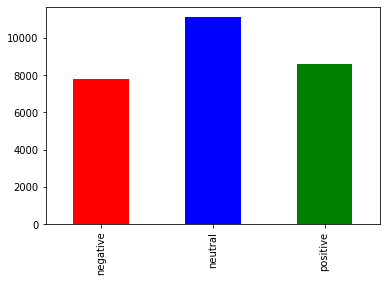

In [ ]:
twitter_data['sentiment'].value_counts().sort_index().plot.bar(color=list('rbg'))

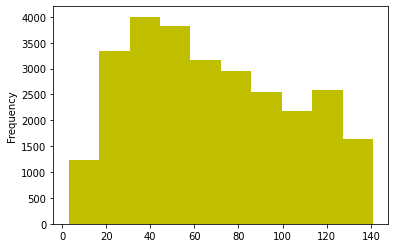

In [ ]:
twitter_data['text'].str.len().plot.hist(color='y')

#Cleaning the dataset

In [ ]:
twitter_data['text'] = twitter_data['text'].apply(lambda x: str(x).lower()) 
twitter_data['text'] = twitter_data['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
twitter_data['text'].head()

0                   i`d have responded if i were going
1           sooo sad i will miss you here in san diego
2                               my boss is bullying me
3                        what interview leave me alone
4     sons of  why couldn`t they put them on the re...
Name: text, dtype: object

#Covrting strings to vectors

In [ ]:
tokenizer = Tokenizer(num_words=3000, split=" ")
tokenizer.fit_on_texts(twitter_data['text'].values)

X = tokenizer.texts_to_sequences(twitter_data['text'].values)
X = pad_sequences(X) 
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    1,  171,   18,   71,    1,  146,
          47],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  413,  116,    1,   60,   91,    7,   90,   10, 1468,
        2224],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    5, 1312,    9,
          17],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   50, 1122,  340,   17,
         497],
       [   0,    0,    0,    0,    0,    0,    0,   

#RNN model building using LSTM

In [ ]:
model = Sequential()
model.add(Embedding(3000, 100, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(100, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 34, 100)           300000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 34, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 34, 100)           80400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 461,103
Trainable params: 461,103
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y = pd.get_dummies(twitter_data['sentiment']).values
[print(twitter_data['sentiment'][i], y[i]) for i in range(0,5)]

neutral [0 1 0]
negative [1 0 0]
negative [1 0 0]
negative [1 0 0]
negative [1 0 0]


[None, None, None, None, None]

#Training Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/20
 - 41s - loss: 0.8599 - accuracy: 0.5968
Epoch 2/20
 - 40s - loss: 0.6675 - accuracy: 0.7235
Epoch 3/20
 - 40s - loss: 0.6153 - accuracy: 0.7483
Epoch 4/20
 - 40s - loss: 0.5841 - accuracy: 0.7636
Epoch 5/20
 - 40s - loss: 0.5615 - accuracy: 0.7753
Epoch 6/20
 - 40s - loss: 0.5422 - accuracy: 0.7815
Epoch 7/20
 - 40s - loss: 0.5229 - accuracy: 0.7884
Epoch 8/20
 - 40s - loss: 0.5039 - accuracy: 0.7989
Epoch 9/20
 - 40s - loss: 0.4867 - accuracy: 0.8065
Epoch 10/20
 - 41s - loss: 0.4688 - accuracy: 0.8120
Epoch 11/20
 - 41s - loss: 0.4472 - accuracy: 0.8210
Epoch 12/20
 - 41s - loss: 0.4315 - accuracy: 0.8278
Epoch 13/20
 - 40s - loss: 0.4183 - accuracy: 0.8334
Epoch 14/20
 - 41s - loss: 0.4006 - accuracy: 0.8421
Epoch 15/20
 - 40s - loss: 0.3826 - accuracy: 0.8483
Epoch 16/20
 - 40s - loss: 0.3718 - accuracy: 0.8542
Epoch 17/20
 - 40s - loss: 0.3556 - accuracy: 0.8604
Epoch 18/20
 - 40s - loss: 0.3497 - accuracy: 0.8616
Epoch 19/20
 - 40s - loss: 0.3334 - accuracy: 0.8672
Ep

#Predicting the output

In [ ]:
predictions = model.predict(X_test)
[print(twitter_data['text'][i], predictions[i], y_test[i]) for i in range(0, 5)]

 i`d have responded if i were going [0.00145537 0.17757581 0.82096875] [0 0 1]
 sooo sad i will miss you here in san diego [0.97018516 0.02706611 0.00274879] [1 0 0]
my boss is bullying me [0.03409832 0.12832658 0.83757514] [0 1 0]
 what interview leave me alone [0.17196919 0.6674136  0.16061719] [0 1 0]
 sons of  why couldn`t they put them on the releases we already bought [0.00739918 0.51977754 0.47282323] [0 1 0]


[None, None, None, None, None]

In [ ]:
pos_count, neu_count, neg_count = 0, 0, 0
act_pos, act_neu, act_neg = 0, 0, 0
for i, prediction in enumerate(predictions):    
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==2:
        act_pos += 1
    elif np.argmax(y_test[i])==1:    
        act_neu += 1
    else:
        act_neg +=1

print('Positive sentiment predictions:', pos_count)
print('Neutral sentiment predictions:', neu_count)
print('Negative sentiment predictions:', neg_count)
print('Actual positive sentiment:', act_pos)
print('Actual neutral sentiment:', act_neu)
print('Actual negative sentiment:', act_neg)

Positive sentiment predictions: 1669
Neutral sentiment predictions: 2246
Negative sentiment predictions: 1582
Actual positive sentiment: 1739
Actual neutral sentiment: 2195
Actual negative sentiment: 1563
